In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

### I did import Quandl into this because I did not need it for my data and also it said it was incompatible with my current Python version

In [2]:
# defining file path

path  = r'C:\Users\Layzr\Desktop\School\Data Immersion Part 6\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'dataset_extended.csv'))

### For this task I added more years to my dataset for the time series to work correctly I hope thats ok.
### I did also make sure the clean it using the same procedures I used in Exercise 6.1

In [4]:
df = df.reset_index()

In [5]:
df_sub = df[['year', 'hr']] 

I decided to select home runs because as a Baseball fan I know that home runs have been on the rise for about the past decade so I wanted to be able to see how much they have been on the rise

In [6]:
df_grouped = df_sub.groupby('year').sum()

In [7]:
df_grouped

,hr
year,
2015,4909
2016,5610
2017,6105
2018,5585
2019,6776
2020,2304
2021,5944
2022,5215
2023,5868


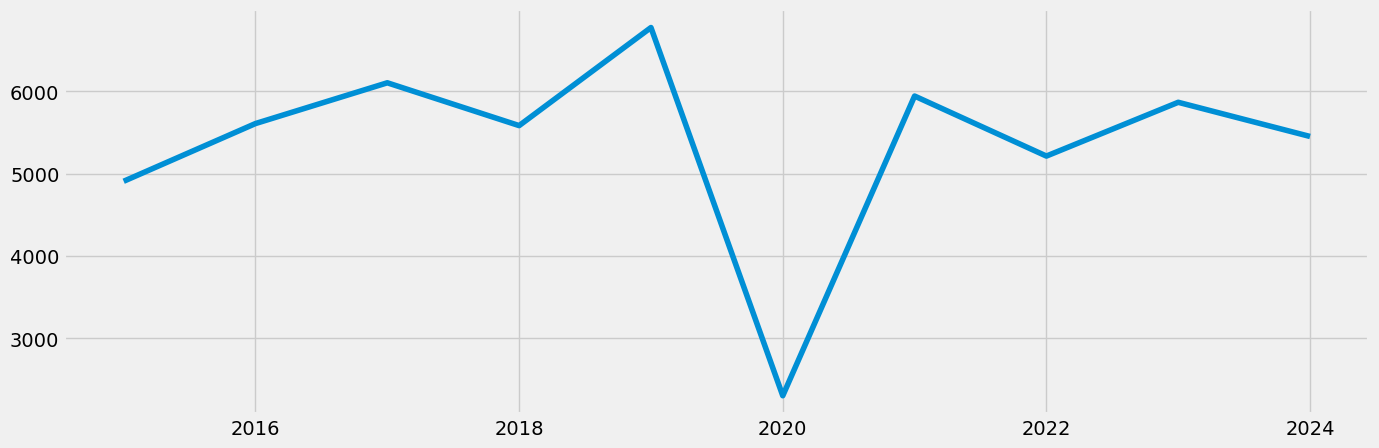

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(df_grouped)

In [9]:
df_grouped.head(10)

,hr
year,
2015,4909
2016,5610
2017,6105
2018,5585
2019,6776
2020,2304
2021,5944
2022,5215
2023,5868


In [10]:
df_grouped = df_grouped.reset_index()

In [11]:
df_test = df_grouped

In [12]:
df_grouped['datetime'] = pd.to_datetime(df_grouped['year'].astype(str), format='%Y')
df_grouped = df_grouped.set_index('datetime')
df_grouped.drop(['year'], axis=1, inplace=True)
df_grouped.head()

,hr
datetime,
2015-01-01,4909
2016-01-01,5610
2017-01-01,6105
2018-01-01,5585
2019-01-01,6776


In [15]:
decomposition = sm.tsa.seasonal_decompose(df_grouped['hr'], model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

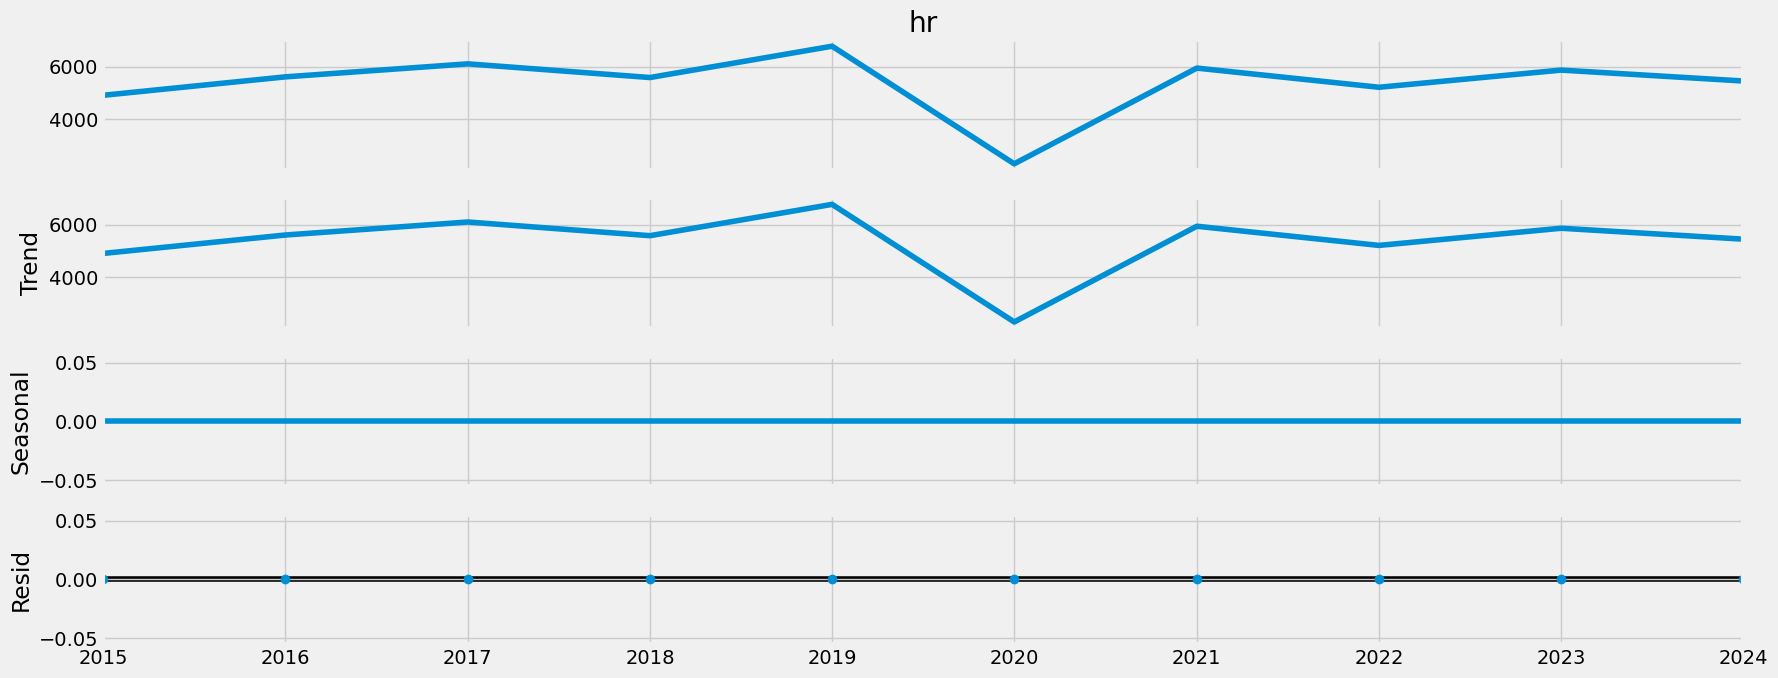

In [17]:
decomposition.plot()
plt.show()

### Data has a little bit of trend with no seasonality or residual. It also takes a huge dip in 2020 due to the fact this was a COVID shortened season of only 60 games vs a normal season of 162.

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_grouped['hr'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.300883
p-value                        0.000443
Number of Lags Used            0.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


### My Test Statistic is lower than both the 5% and 10% Critical Values meaning my null hypothesis of there being a unit root can be disproven.

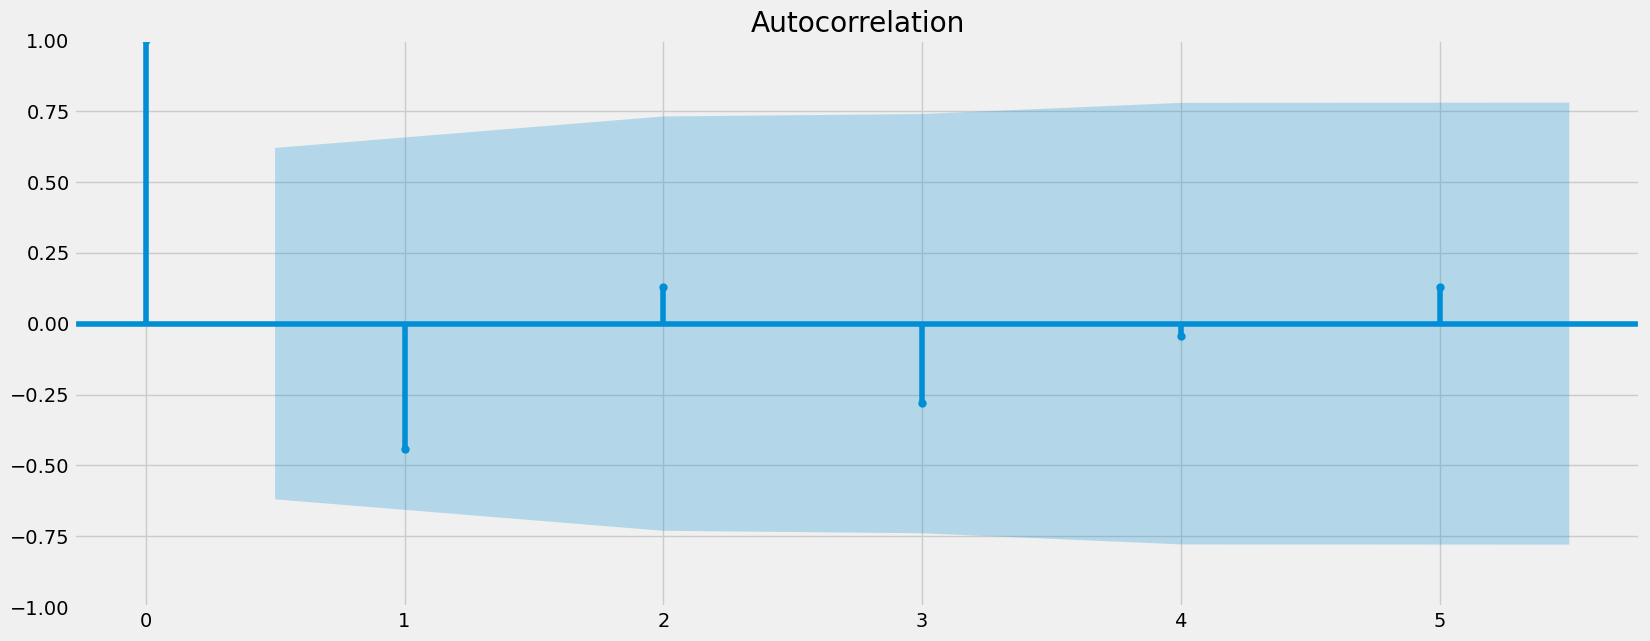

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_grouped)
plt.show()

### Only 1 value falls above the confidence interval